<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2021_AAPL_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-13 12:16:19--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.213.102, 173.194.213.101, 173.194.213.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.213.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r2mggjb0bromrcue8ee6jdbdh09qpf7t/1673612175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=cdc90842-676e-4367-8a44-8440bc3cfbec [following]
--2023-01-13 12:16:20--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r2mggjb0bromrcue8ee6jdbdh09qpf7t/1673612175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=cdc90842-676e-4367-8a44-8440bc3cfbec
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.214.132, 2607:f8b0:400c:c0b::84
Connecting to d

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_10_28_Q4.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Apple,0.0,0.0,proper noun,compound,True,False,False,False
1,Inc.,0.0,0.0,proper noun,root,False,False,False,False
2,(,0.0,0.0,punctuation,punctuation,False,False,True,False
3,NASDAQ,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
4,:,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
9821,We,0.0,0.0,pronoun,nominal subject,True,True,False,False
9822,appreciate,0.0,0.0,verb,root,True,False,False,False
9823,your,0.0,0.0,pronoun,possession modifier,True,True,False,False
9824,participation,0.0,0.0,noun,direct object,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          9826 non-null   object 
 1   Polarity      9826 non-null   float64
 2   Subjectivity  9826 non-null   float64
 3   Pos_          9826 non-null   object 
 4   Dep_          9821 non-null   object 
 5   Alpha         9826 non-null   bool   
 6   Stopword      9826 non-null   bool   
 7   Punct         9826 non-null   bool   
 8   Num           9826 non-null   bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 422.3+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Apple,0.0,0.0,proper noun,compound,True,False,False,False
3,NASDAQ,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
5,AAPL,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
9,Results,0.0,0.0,noun,compound,True,False,False,False
10,Conference,0.0,0.0,proper noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9816,concludes,0.0,0.0,verb,root,True,False,False,False
9817,today,0.0,0.0,noun,possession modifier,True,False,False,False
9819,conference,0.0,0.0,noun,direct object,True,False,False,False
9822,appreciate,0.0,0.0,verb,root,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
9,Results,0.0,0.0,noun,compound,True,False,False,False
17,PM,0.0,0.0,noun,appositional modifier,True,False,False,False
33,CFOConference,0.0,0.0,noun,modifier of nominal,True,False,False,False
75,day,0.0,0.0,noun,object of preposition,True,False,False,False
78,welcome,0.8,0.9,adjective,conjunct,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9816,concludes,0.0,0.0,verb,root,True,False,False,False
9817,today,0.0,0.0,noun,possession modifier,True,False,False,False
9819,conference,0.0,0.0,noun,direct object,True,False,False,False
9822,appreciate,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
95,recorded,0.0,0.0,verb,root,True,False,False,False
109,like,0.0,0.0,verb,root,True,False,False,False
129,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False
135,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False
136,afternoon,0.0,0.0,noun,root,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9808,Thank,0.0,0.0,verb,root,True,False,False,False
9816,concludes,0.0,0.0,verb,root,True,False,False,False
9819,conference,0.0,0.0,noun,direct object,True,False,False,False
9822,appreciate,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
129,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False
135,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False
197,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
199,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False
211,gross,0.0,0.0,adjective,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9766,available,0.4,0.4,adjective,adjectival complement,True,False,False,False
9768,approximately,-0.4,0.6,adverb,adverbial modifier,True,False,False,False
9780,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False
9793,Financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    720.000000
mean       0.101712
std        0.228147
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.136364
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    720.000000
mean       0.312088
std        0.336427
min        0.000000
25%        0.000000
50%        0.250000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
129,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
135,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
197,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
199,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False,Neutral,Objective
211,gross,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
9766,available,0.4,0.4,adjective,adjectival complement,True,False,False,False,Positive,Subjective
9768,approximately,-0.4,0.6,adverb,adverbial modifier,True,False,False,False,Negative,Subjective
9780,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
9793,Financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,47
1,Neutral,Objective,324
2,Neutral,Subjective,111
3,Positive,Subjective,238


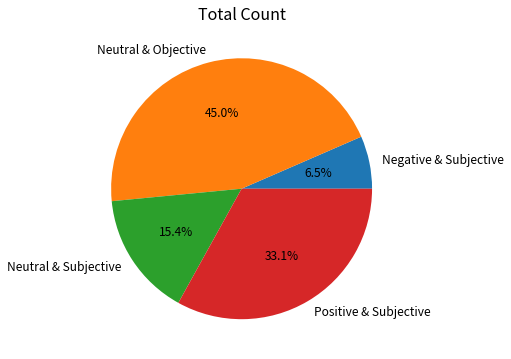

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

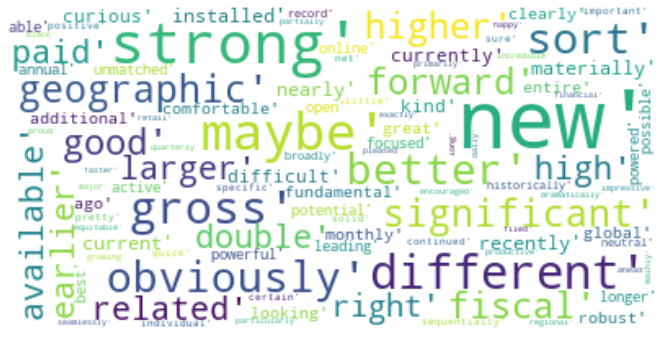

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Apple Inc. (NASDAQ:AAPL) Q4 2021 Results Confe...,0.2,0.225
1,Today’s call is being recorded.,0.0,0.000
2,"At this time, for opening remarks and introduc...",0.0,0.000
3,Please go ahead.,0.0,0.000
4,Tejas GalaThank you.,0.0,0.000
...,...,...,...
446,Members of the press with additional questions...,0.0,0.000
447,Financial analysts can contact me with additio...,0.0,0.000
448,Thank you again for joining us.,0.0,0.000
449,OperatorThis concludes today’s conference.,0.0,0.000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    451.000000
mean       0.130528
std        0.220567
min       -0.650000
25%        0.000000
50%        0.000000
75%        0.250000
max        0.910000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    451.000000
mean       0.344276
std        0.299884
min        0.000000
25%        0.000000
50%        0.375000
75%        0.550000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,Apple Inc. (NASDAQ:AAPL) Q4 2021 Results Confe...,0.2,0.225,Positive,Subjective
1,Today’s call is being recorded.,0.0,0.000,Neutral,Objective
2,"At this time, for opening remarks and introduc...",0.0,0.000,Neutral,Objective
3,Please go ahead.,0.0,0.000,Neutral,Objective
4,Tejas GalaThank you.,0.0,0.000,Neutral,Objective
...,...,...,...,...,...
446,Members of the press with additional questions...,0.0,0.000,Neutral,Objective
447,Financial analysts can contact me with additio...,0.0,0.000,Neutral,Objective
448,Thank you again for joining us.,0.0,0.000,Neutral,Objective
449,OperatorThis concludes today’s conference.,0.0,0.000,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,38
1,Neutral,Objective,144
2,Neutral,Subjective,49
3,Positive,Subjective,220


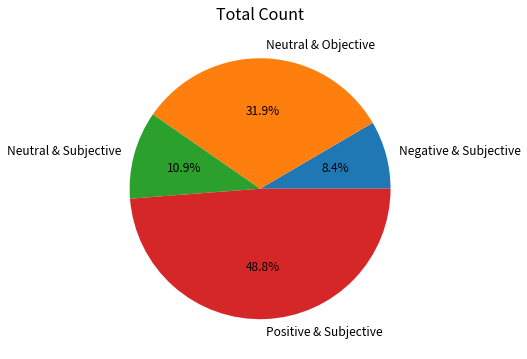

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)Please note that some of the information you’ll hear during our discussion today will consist of forward-looking statements, including, without limitation, those regarding revenue, gross margin, operating expenses, other income and expense, taxes, capital allocation and future business outlook, including the potential impact of COVID-19 on the Company’s business and results of operations.

2)Those programs join our ever-expanding work with historically black colleges and universities, including the now 45 community coding centers and regional hubs, serving underrepresented communities across the United States.

3)This level of sales performance, combined with the unmatched loyalty of our customers and the strength of our ecosystem, drove our installed base of active devices to a new all-time record.

4)Company gross margin was 42.2%, down 110 basis points from last quarter, due to higher costs and a different mix of products, partially offset by leverage.

5)Products gross margin was

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)Today’s call is being recorded.

2)At this time, for opening remarks and introductions, I would like to turn the call over to Tejas Gala, Director of Investor Relations and Corporate Finance.

3)Please go ahead.

4)Tejas GalaThank you.

5)I’d like to now turn the call over to Tim for introductory remarks.

6)A year ago, I spoke to you about the atmosphere of uncertainty in which we were living and the way it had come to define our daily experience, both as people and as a company.

7)I’m grateful to our teams who have stayed resolutely focused on our customers and the pursuit of innovation on their behalf.

8)We’ve aimed to help our customers navigate the world as it is while empowering them to create the world as it can be.

9)This fiscal year, we reported $366 billion of revenue, which represents 33% annual growth.

10)Even so, we set an all-time record for Mac and quarterly records for iPhone, iPad, Wearables, Home and Accessories, representing 30% year-over-year growth in product

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)After that, we’ll open the call to questions from analysts.

2)These statements involve risks and uncertainties that may cause actual results or trends to differ materially from our forecast.

3)Apple assumes no obligation to update any forward-looking statements or information which speak as of their respective dates.

4)All of our stores are now open worldwide and have been for 7 weeks.

5)Teams across Apple are pushing this work forward in the same spirit of innovation we bring to our products and services.

6)From the pandemic to climate change to an equity and injustice, global challenges won’t abide solitary solutions, and we feel a deep sense of responsibility to help.

7)Another example is France’s national railway company, SNCF, which equips all train drivers with iPads to manage their entire daily workflow and train operations, helping to lower energy and maintenance costs.

8)In fact, the iPads have been so well received that 90% of the drivers choose to purchase them for 

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)Apple Inc. (NASDAQ:AAPL) Q4 2021 Results Conference Call October 28, 2021 5:00 PM ETCompany ParticipantsTejas Gala - Director, IR and Corporate FinanceTim Cook - CEOLuca Maestri - CFOConference Call ParticipantsShannon Cross - Cross ResearchAmit Daryanani - EvercoreKaty Huberty - Morgan StanleyDavid Vogt - UBSKrish Sankar - Cowen and CompanySamik Chatterjee - JP MorganJim Suva - CitigroupChris Caso - Raymond JamesHarsh Kumar - Piper SandlerWamsi Mohan - Bank of AmericaOperatorGood day, and welcome to the Apple Q4 Fiscal Year 2021 Earnings Conference Call.

2)Good afternoon, and thank you for joining us.

3)Speaking today first is Apple’s CEO, Tim Cook; and he’ll be followed by CFO, Luca Maestri.

4)For more information, please refer to the risk factors discussed in Apple’s most recently filed annual report on Form 10-K and the Form 8-K filed with the SEC today, along with the associated press release.

5)Tim CookThanks, Tejas, and good afternoon, everyone, and thank you for joining t

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

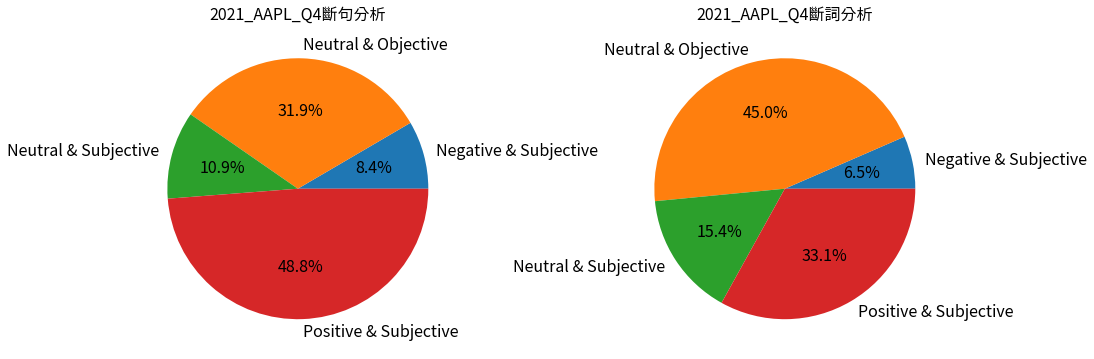

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]

axs[1].pie(size, labels=label, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[1].set_title('2021_AAPL_Q4斷詞分析', fontsize=16)


axs[0].pie(_size, labels=label, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[0].set_title('2021_AAPL_Q4斷句分析', fontsize=16)


plt.savefig("2021_AAPL_Q4.png")
from google.colab import files
files.download("2021_AAPL_Q4.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 1058246 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html


5家公司，4季，2年 =5* 4 * 2=40